In [4]:
#导入所需模块
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [12]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

In [13]:
#将features（数字图像特征值）使用reshape转换
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [14]:
#将features（数字图像特征值）标准化
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [16]:
#label（数字真是的值）以one-Hot Encoding进行转换
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [19]:
#建立模型
#导入所需模块
from keras.models import Sequential
from keras.layers import Dense

In [21]:
#建立Sequential模型
model = Sequential()

In [23]:
#建立“输入层”“隐藏层”
model.add(Dense(units = 256,        #定义隐藏层神经元个数为256
               input_dim = 784,       #设置输入层神经元个数为784
               kernel_initializer = 'normal',         #使用normal distribution正态分布的随机数来初始化weight和bias
               activation = 'relu'))        #定义激活函数为relu

In [24]:
#建立输出层    
model.add(Dense(units = 10,        #定义输出层神经元个数
               kernel_initializer = 'normal',
               activation = 'softmax'))

In [25]:
#查看模型的摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
#进行训练
#定义了训练方式
model.compile(loss ='categorical_crossentropy',     #设置损失函数
             optimizer = 'adam',metrics = ['accuracy'])     #训练时使用adam优化器，设置评估模型方式是准确度

In [28]:
train_history = model.fit(x = x_Train_normalize,           #输入训练数据参数
                         y = y_Train_OneHot,validation_split = 0.2,   #将数据80%作为训练数据，20%作为验证数据
                         epochs = 10,batch_size = 200,verbose = 2)    #执行10个训练周期，每个周期200项数据，显示训练过程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4395 - acc: 0.8823 - val_loss: 0.2180 - val_acc: 0.9412
Epoch 2/10
 - 1s - loss: 0.1908 - acc: 0.9455 - val_loss: 0.1556 - val_acc: 0.9558
Epoch 3/10
 - 1s - loss: 0.1356 - acc: 0.9620 - val_loss: 0.1255 - val_acc: 0.9649
Epoch 4/10
 - 1s - loss: 0.1032 - acc: 0.9702 - val_loss: 0.1124 - val_acc: 0.9683
Epoch 5/10
 - 1s - loss: 0.0814 - acc: 0.9773 - val_loss: 0.0981 - val_acc: 0.9715
Epoch 6/10
 - 1s - loss: 0.0662 - acc: 0.9814 - val_loss: 0.0933 - val_acc: 0.9716
Epoch 7/10
 - 1s - loss: 0.0546 - acc: 0.9850 - val_loss: 0.0907 - val_acc: 0.9740
Epoch 8/10
 - 1s - loss: 0.0459 - acc: 0.9876 - val_loss: 0.0822 - val_acc: 0.9762
Epoch 9/10
 - 1s - loss: 0.0379 - acc: 0.9900 - val_loss: 0.0812 - val_acc: 0.9761
Epoch 10/10
 - 1s - loss: 0.0315 - acc: 0.9918 - val_loss: 0.0794 - val_acc: 0.9763


In [29]:
#建立showt_rain_history显示训练过程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    plt.show()

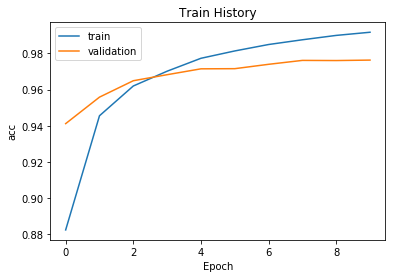

In [30]:
#画出准确率执行结果
show_train_history(train_history,'acc','val_acc')

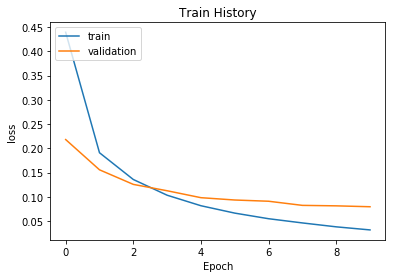

In [31]:
#画出误差执行结果
show_train_history(train_history,'loss','val_loss')

In [32]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy = ',scores[1])

10000/10000 [==============================] - 0s 17us/step

accuracy =  0.9756


In [34]:
#执行预测
prediction = model.predict_classes(x_Test)

In [35]:
#预测结果
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [37]:
def plot_images_labels_prediction(images,labels,prediction,idx,num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1)                     #建立subgraph子图形为5行5列
        ax.imshow(images[idx],cmap = 'binary')         #画出subgraph子图形
        title = 'label=' + str(labels[idx])              #设置子图形title，显示标签字段
        if len(prediction) > 0:                       #如果传入了预测结果
            title += ',predict=' + str(prediction[idx])    #标题title加入预测结果
        
        ax.set_title(title,fontsize = 10)                 #设置子图形标题title的大小
        ax.set_xticks([]);ax.set_yticks([])               #设置不显示刻度
        idx += 1
    plt.show()

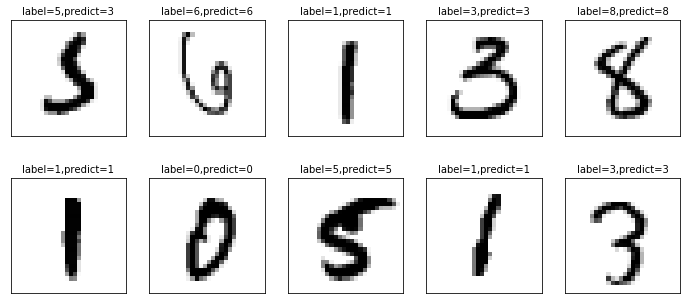

In [38]:
#显示10项预测结果
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx = 340)

In [39]:
#显示混淆矩阵
#使用pandas crosstab建立混淆矩阵
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames = ['label'],colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,2,2,0,2,4,7,0
3,0,0,5,991,0,1,0,3,6,4
4,1,0,5,1,962,0,3,0,3,7
5,3,0,0,16,1,849,7,2,11,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,13,7,1,0,0,989,5,8
8,5,0,3,7,2,1,1,2,952,1


In [41]:
#建立真实值与预测DataFrame
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [43]:
#查询真是值是5，但预测值是3的数据
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


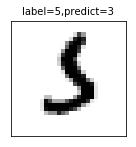

In [45]:
#查看第340项数据
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx = 340,num = 1)